ESA HSA-query Demo
==

Show observations around the "GN-z11" grism observations.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from hsaquery import query

In [3]:
# Query the GN-z11 program itself (GO-13871)
tab = query.run_query(box=None, proposid=[13871], instruments=['WFC3', 'ACS'], filters=[])
tab['orientat'] = [query.get_orientat(p) for p in tab['footprint']]    

In [4]:
# Compute total exposure time by filter
print('Filter  Nexp   Texp')
print('===================')
for filt in np.unique(tab['filter']):
    sel = tab['filter'] == filt
    print('{0:5} {1:>5d} {2:>10.1f}'.format(filt, sel.sum(), tab['exptime'][sel].sum()))

Filter  Nexp   Texp
F140W    24     4270.4
F435W    24    34176.0
G141     24    31870.5


In [5]:
# Search for additional observations around the pointing center
box = [np.median(tab['ra']), np.median(tab['dec']), 12] # last is radius, in arcmin

filters = ['G102', 'F140W', 'F775W']
#filters = ['F140W']
extras = query.run_query(box=box, proposid=[], instruments=['WFC3', 'ACS'], filters=filters, 
                         extra=[])

In [6]:
print('Number of additional datasets: {0}'.format(len(extras)))

print('Filter  Nexp   Texp')
print('===================')
for filt in np.unique(extras['filter']):
    sel = extras['filter'] == filt
    print('{0:5} {1:>5d} {2:>10.1f}'.format(filt, sel.sum(), extras['exptime'][sel].sum()))

Number of additional datasets: 1359
Filter  Nexp   Texp
F140W   174    42781.2
F775W   645   346242.0
G102    540   491335.9


G102
F140W
F775W


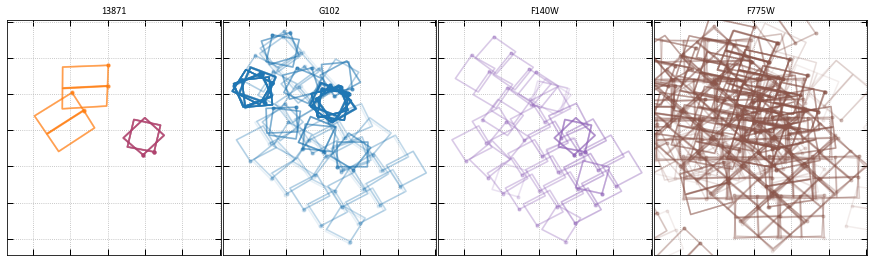

In [7]:
### Make a figure

fig = plt.figure(figsize=[12,3.5])

ax = fig.add_subplot(141)
query.show_footprints(tab, ax=ax)
ax.set_title('13871')

for i, filt in enumerate(filters):
    print(filt)    
    ax = fig.add_subplot(142+i)
    query.show_footprints(extras[extras['filter'] == filt], ax=ax)
    ax.set_title(filt)

for ax in fig.axes:        
    ax.set_xlim(189.46939409999999, 188.89701790000001)
    ax.set_ylim(62.078094353454389, 62.402351754992722)
    ax.grid()
    ax.set_xticklabels([])
    ax.set_yticklabels([])

fig.tight_layout(pad=0.2)

## Find overlapping datasets

The example below shows how to 

  1) Perform a "parent" query for a specific program

  2) Break the "parent" into discrete groups of *overlapping* exposures

  3) Find any additional data that overlap with those groups

In [7]:
import numpy as np
from hsaquery import query, overlaps

# Parent query is grism exposures from GO-14230
parent = query.run_query(box=None, proposid=[14230], instruments=['WFC3'], 
                         extensions=['FLT'], filters=['G102','G141'], extra=[])

print(len(parent))
print(np.unique(parent['filter']))
print(np.unique(parent['target']))

30
filter
------
  G102
  G141
    target    
--------------
SDSSJ1723+3411
SDSSJ2340+2947


### The overlaps

The `overlaps.find_overlaps` first determines the overlapping groups from the `parent` table and then finds additional exposures that overlap with those groups.

The groups are assigned a name based on the coordinate center of the parent group like `jHHMMSS±DDMMSS`, and information of that group is stored to ascii and table files, along with a footprint figure.
    
    j172336+341156_footprint.fits # Table
    j172336+341156_footprint.npy  # Group polygon and [ra, dec, size] list
    j172336+341156_footprint.pdf  # Figure
    j172336+341156_info.dat       # Ascii report


Parse 1
Parse 2
Parse 3
Parse 4
Parse 5
Parse 6
Parse 7
Parse 8
Parse 9
Parse 10
Parse 11
Parse 12
Parse 13
Parse 14
Parse 15
Parse 16
Parse 17
Parse 18
Parse 19
Parse 20
Parse 21
Parse 22
Parse 23
Parse 24
Parse 25
Parse 26
Parse 27
Parse 28
Parse 29
Iter #1, N_Patch = 2


 0 j172336+341156 260.90082965 34.1994041836
 TARGET_NAME  
--------------
       CSWA-14
SDSSJ1723+3411 

filter j172336+341156         ACS/WFC F475W    3    2433.0
filter j172336+341156         ACS/WFC F606W    3    2433.0
filter j172336+341156         ACS/WFC F814W    3    2433.0
filter j172336+341156         WFC3/IR F105W    8     923.5
filter j172336+341156         WFC3/IR F110W    4    1111.8
filter j172336+341156         WFC3/IR F140W    8     923.5
filter j172336+341156         WFC3/IR F160W    4    1111.8
filter j172336+341156          WFC3/IR G102    8    9923.5
filter j172336+341156          WFC3/IR G141    8    9923.5
filter j172336+341156       WFC3/UVIS F390W    4    2368.0
filter j172336+341156       

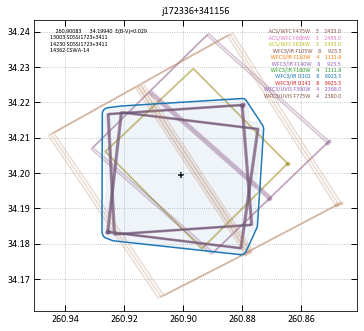

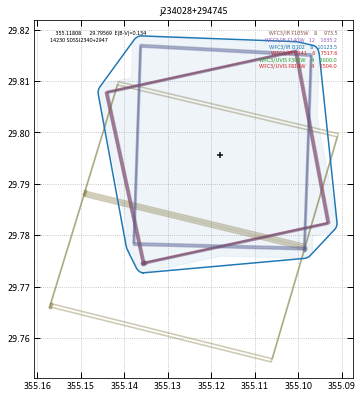

In [9]:
extra = query.DEFAULT_EXTRA
tabs = overlaps.find_overlaps(parent, buffer_arcmin=0.1, filters=[], 
                              proposid=[], instruments=['WFC3','ACS'], 
                              extra=extra, close=False)

In [19]:
t = tabs[1]
for k in t.meta:
    print('{0:>8}: {1}'.format(k, t.meta[k]))

    NAME: j234028+294745
      RA: 355.1180796495714
     DEC: 29.795685351950006
  MW_EBV: 0.1341


In [20]:
t[t['filter'] == 'G102'].show_in_notebook()

idx,observation_id,start_time,end_time,start_time_mjd,end_time_mjd,exptime,release_date,run_id,program_id,visit,collection,intent,members_no,target,target_description,moving_target,ra,dec,ecl_lat,ecl_lon,gal_lat,gal_lon,footprint,fov_size,pixscale,instrument,detector,filter,proposal_id,science_category,pi_name,file_name,file_extension,jtargname,instdet
0,ICWX08J7Q,2016-07-19 21:40:19.0,2016-07-19 22:00:22.0,57588.8203,57588.8320,1203,2017-07-20 02:15:16.0,J7,CWX,8,HST,Science,0,SDSSJ2340+2947,GALAXY;GRAVITATIONAL LENS;HIGH REDSHIFT GALAXY,false,355.117665,29.797036,29.032282,8.544229,-30.597173,105.040426,Polygon ICRS 355.098773 29.777541 355.097203 29.815172 355.136409 29.816979 355.137959 29.778420,0.051,0.156,WFC3,IR,G102,14230,UNRESOLVED STELLAR POPULATIONS AND GALAXY STRUCTURE,RIGBY JANE R.,icwx08j7q_flt.fits.gz,FLT,j234020+295000,WFC3/IR
1,ICWX08J8Q,2016-07-19 22:01:25.0,2016-07-19 22:21:28.0,57588.8359,57588.8477,1203,2017-07-20 02:15:16.0,J8,CWX,8,HST,Science,0,SDSSJ2340+2947,GALAXY;GRAVITATIONAL LENS;HIGH REDSHIFT GALAXY,false,355.117547,29.796656,29.031989,8.543928,-30.597502,105.040174,Polygon ICRS 355.098655 29.777161 355.097085 29.814792 355.136291 29.816599 355.137840 29.778040,0.051,0.156,WFC3,IR,G102,14230,UNRESOLVED STELLAR POPULATIONS AND GALAXY STRUCTURE,RIGBY JANE R.,icwx08j8q_flt.fits.gz,FLT,j234020+295000,WFC3/IR
2,ICWX08JCQ,2016-07-19 23:11:54.0,2016-07-19 23:33:37.0,57588.8828,57588.8984,1303,2017-07-20 02:15:16.0,JC,CWX,8,HST,Science,0,SDSSJ2340+2947,GALAXY;GRAVITATIONAL LENS;HIGH REDSHIFT GALAXY,false,355.117288,29.796778,29.032200,8.543763,-30.597315,105.039972,Polygon ICRS 355.098396 29.777284 355.096826 29.814915 355.136032 29.816721 355.137582 29.778163,0.051,0.156,WFC3,IR,G102,14230,UNRESOLVED STELLAR POPULATIONS AND GALAXY STRUCTURE,RIGBY JANE R.,icwx08jcq_flt.fits.gz,FLT,j234020+295000,WFC3/IR
3,ICWX08JEQ,2016-07-19 23:34:40.0,2016-07-19 23:56:23.0,57588.8984,57588.9141,1303,2017-07-20 02:15:16.0,JE,CWX,8,HST,Science,0,SDSSJ2340+2947,GALAXY;GRAVITATIONAL LENS;HIGH REDSHIFT GALAXY,false,355.117408,29.797160,29.032493,8.544066,-30.596986,105.040225,Polygon ICRS 355.098516 29.777665 355.096946 29.815296 355.136152 29.817103 355.137701 29.778544,0.051,0.156,WFC3,IR,G102,14230,UNRESOLVED STELLAR POPULATIONS AND GALAXY STRUCTURE,RIGBY JANE R.,icwx08jeq_flt.fits.gz,FLT,j234020+295000,WFC3/IR
4,ICWX09U2Q,2016-10-07 17:19:04.0,2016-10-07 17:39:07.0,57668.6367,57668.6523,1203,2017-10-08 03:43:49.0,U2,CWX,9,HST,Science,0,SDSSJ2340+2947,GALAXY;GRAVITATIONAL LENS;HIGH REDSHIFT GALAXY,false,355.118203,29.795367,29.030583,8.543840,-30.598904,105.040330,Polygon ICRS 355.135423 29.774740 355.092976 29.782527 355.100433 29.815971 355.143928 29.807952,0.051,0.156,WFC3,IR,G102,14230,UNRESOLVED STELLAR POPULATIONS AND GALAXY STRUCTURE,RIGBY JANE R.,icwx09u2q_flt.fits.gz,FLT,j234020+295000,WFC3/IR
5,ICWX09U3Q,2016-10-07 17:40:10.0,2016-10-07 18:01:53.0,57668.6523,57668.6680,1303,2017-10-08 03:43:49.0,U3,CWX,9,HST,Science,0,SDSSJ2340+2947,GALAXY;GRAVITATIONAL LENS;HIGH REDSHIFT GALAXY,false,355.118599,29.795176,29.030256,8.544091,-30.599194,105.040639,Polygon ICRS 355.135819 29.774548 355.093372 29.782335 355.100829 29.815779 355.144325 29.807760,0.051,0.156,WFC3,IR,G102,14230,UNRESOLVED STELLAR POPULATIONS AND GALAXY STRUCTURE,RIGBY JANE R.,icwx09u3q_flt.fits.gz,FLT,j234020+295000,WFC3/IR
6,ICWX09U7Q,2016-10-07 18:52:35.0,2016-10-07 19:14:18.0,57668.7031,57668.7188,1303,2017-10-08 03:43:49.0,U7,CWX,9,HST,Science,0,SDSSJ2340+2947,GALAXY;GRAVITATIONAL LENS;HIGH REDSHIFT GALAXY,false,355.118399,29.794988,29.030167,8.543817,-30.599318,105.040379,Polygon ICRS 355.135620 29.774360 355.093173 29.782147 355.100630 29.815591 355.144125 29.807572,0.051,0.156,WFC3,IR,G102,14230,UNRESOLVED STELLAR POPULATIONS AND GALAXY STRUCTURE,RIGBY JANE R.,icwx09u7q_flt.fits.gz,FLT,j234020+295000,WFC3/IR
7,ICWX09U9Q,2016-10-07 19:15:21.0,2016-10-07 19:37:04.0,57668.7188,57668.7344,1303,2017-10-08 03:43:49.0,U9,CWX,9,HST,Science,0,SDSSJ2340+

Parse 1
Parse 2
Parse 3
Parse 4
Parse 5
Parse 6
Parse 7
Parse 8
Parse 9
Parse 10
Parse 11
Parse 12
Parse 13
Parse 14
Parse 15
Parse 16
Parse 17
Parse 18
Parse 19
Parse 20
Parse 21
Parse 22
Parse 23
Parse 24
Parse 25
Parse 26
Parse 27
Parse 28
Parse 29
Parse 30
Parse 31
Parse 32
Parse 33
Parse 34
Parse 35
Parse 36
Parse 37
Parse 38
Parse 39
Parse 40
Parse 41
Parse 42
Parse 43
Parse 44
Parse 45
Parse 46
Parse 47
Parse 48
Parse 49
Parse 50
Parse 51
Parse 52
Parse 53
Parse 54
Parse 55
Parse 56
Parse 57
Parse 58
Parse 59
Parse 60
Parse 61
Parse 62
Parse 63
Parse 64
Parse 65
Parse 66
Parse 67
Parse 68
Parse 69
Parse 70
Parse 71
Parse 72
Parse 73
Parse 74
Parse 75
Parse 76
Parse 77
Parse 78
Parse 79
Parse 80
Parse 81
Parse 82
Parse 83
Parse 84
Parse 85
Parse 86
Parse 87
Parse 88
Parse 89
Parse 90
Parse 91
Parse 92
Parse 93
Parse 94
Parse 95
Parse 96
Parse 97
Parse 98
Parse 99
Parse 100
Parse 101
Parse 102
Parse 103
Parse 104
Parse 105
Parse 106
Parse 107
Parse 108
Parse 109
Parse 110
Parse 11

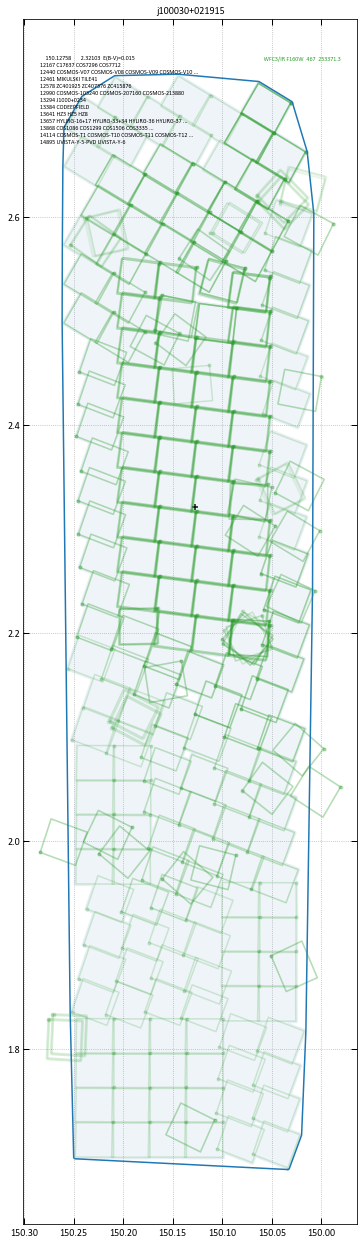

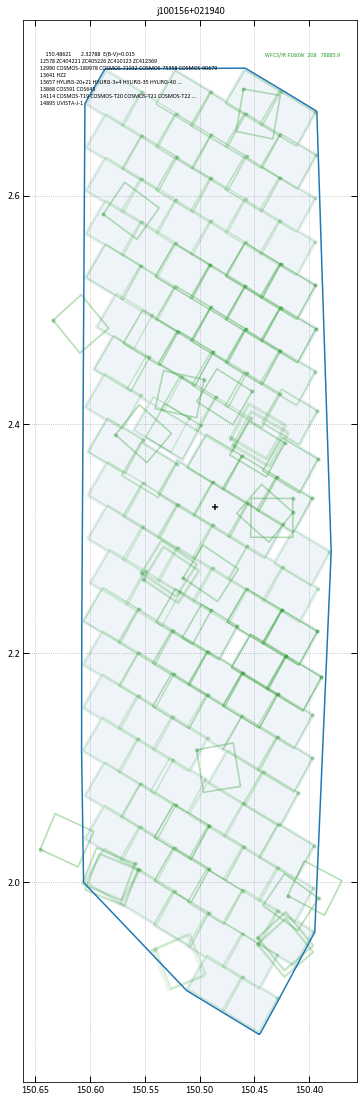

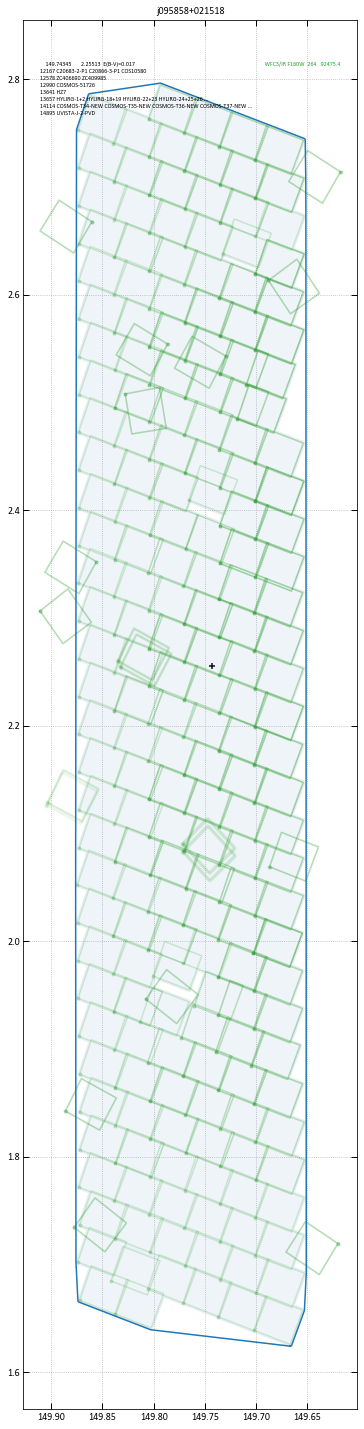

In [1]:
# COSMOS F160W mosaics, between DASH and CANDELS
from hsaquery import query, overlaps
parent = query.run_query(box=None, proposid=[14114, 12440], instruments=['WFC3'], 
                         extensions=['FLT'], filters=['F160W'], extra=[])

extra = query.DEFAULT_EXTRA
tabs = overlaps.find_overlaps(parent, buffer_arcmin=0.1, filters=['F160W'], 
                              proposid=[], instruments=['WFC3'], 
                              extra=extra, close=False)